In [2]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import gc



# Let's take a look at a few records in the dataset


In [42]:

df_churn = pd.read_csv('/Users/chidam_sp/Desktop/churn_data.csv')


In [78]:
#Let's make a copy of the file

df_train = df_churn.copy()



In [79]:
df_train.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [80]:

len(df_train)


5630

In [77]:
# del df_train

In [81]:

df_train.columns


Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [51]:

len(df_train.columns)


20


# Let's drop the string columns for now along with Churn to do some plots and check the numeric ones 


In [83]:
df_train[["CustomerID", "PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Churn"]]


,CustomerID,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn
0,50001,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1
1,50002,Phone,UPI,Male,Mobile,Single,1
2,50003,Phone,Debit Card,Male,Mobile,Single,1
3,50004,Phone,Debit Card,Male,Laptop & Accessory,Single,1
4,50005,Phone,CC,Male,Mobile,Single,1
...,...,...,...,...,...,...,...
5625,55626,Computer,Credit Card,Male,Laptop & Accessory,Married,0
5626,55627,Mobile Phone,Credit Card,Male,Fashion,Married,0
5627,55628,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,0
5628,55629,Computer,Credit Card,Male,Laptop & Accessory,Married,0


In [86]:
#Let's select the string columns and store them in a variable

df_train_categorical = df_train[["CustomerID", "PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Churn"]]




In [88]:
df_train_categorical.head()

,CustomerID,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn
0,50001,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1
1,50002,Phone,UPI,Male,Mobile,Single,1
2,50003,Phone,Debit Card,Male,Mobile,Single,1
3,50004,Phone,Debit Card,Male,Laptop & Accessory,Single,1
4,50005,Phone,CC,Male,Mobile,Single,1


In [89]:
#Drop only the categorical columns from df_train
df_train.drop(["CustomerID", "PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"], axis=1, inplace=True)


In [90]:

len(df_train.columns)


14

In [95]:
#Let's replace the null values in the numerical columns with 0 for now for easy plotting 

df_train.replace(np.nan, 0, inplace=True)



## Correlation Heatmap of features in 


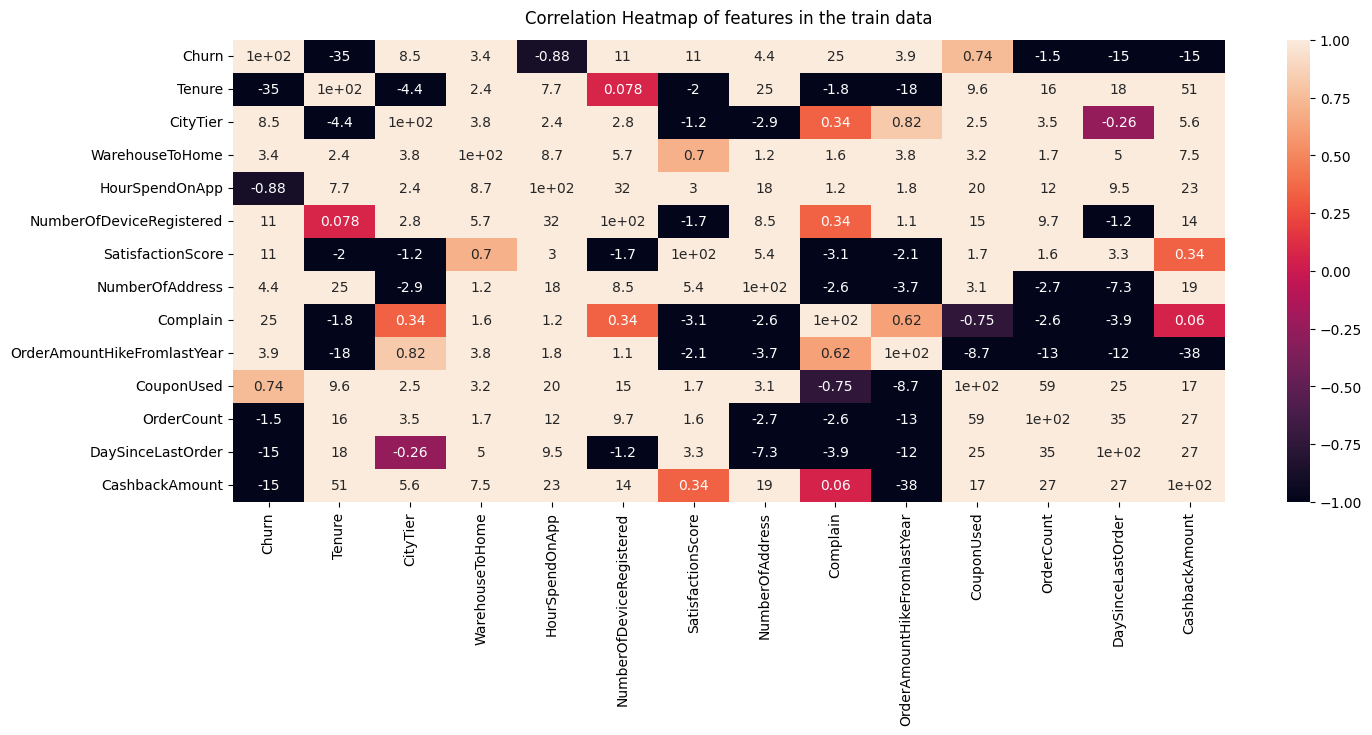

In [96]:
plt.figure(figsize=(16, 6))
correlation = df_train.corr()
correlation_percent = correlation * 100
heatmap = sns.heatmap(correlation_percent, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of features in the train data', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap of features in the train data before transformation.png', dpi=300, bbox_inches='tight')


# Observation 

Except for the diagonal in the above heatmap figure, we can see that some significant correlations amongst a few features:
1. 59% correlation exists between CouponUsed and OrderCount.
2. Tenure and CashbackAmount seem to be positively correlated at 51%
3. A 35% correlation exists between DaySinceLastOrder and OrderCount.
4. Some negatively correlated features such as -1.2% between CityTier and SatisfactionScore can also be found.
5. It makes sense to see that a negative correlation exists between Tenure and Churn. The relationship substantiates this: The longer a customer stays with an organization, the fewer Churn occurs.
6. Similar to point 5, a negative correlation exists between DaySinceLastOrder and Churn / CashbackAmount and Churn.




# Correlation of Independent Variables with the Target


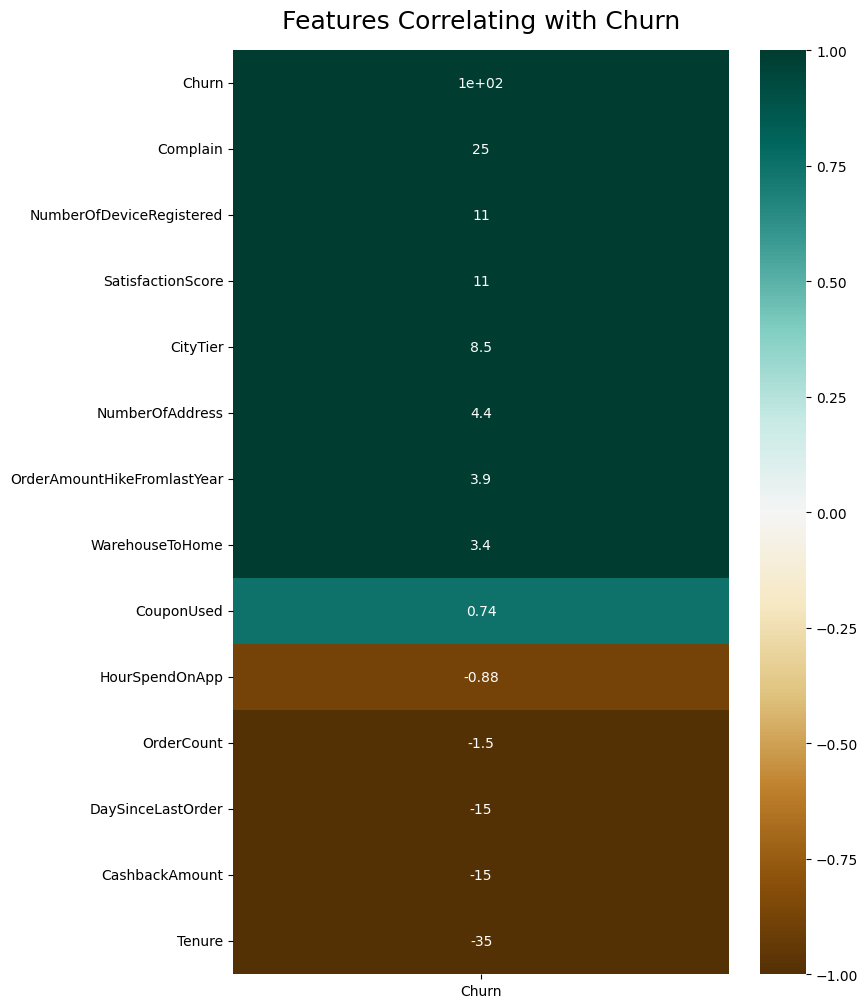

In [97]:

dfcorr_with_target = df_train.corr()[['Churn']].sort_values(by='Churn', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dfcorr_with_target*100, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);


Observation

The above plot shows us some positively and negatively correlated features with the target variable, Churn.
# To summarize: there is a need to monitor correlation during the feature engineering step.


In [25]:
# Churn Vs. Complain (as it has topped the list in the above chart)

df_train.loc[df_train["Churn"] == 1, "Complain"].value_counts(dropna=False)



Complain
1    508
0    440
Name: count, dtype: int64

In [26]:

df_train.loc[df_train["Churn"] == 0, "Complain"].value_counts(dropna=False)


Complain
0    3586
1    1096
Name: count, dtype: int64

# No clear pattern on Complain

Initially, it may look like customers who complained a lot had churned. But looking at the statement: df_train["Churn"] == 0, we cannot 
be sure of an obvious pattern regarding Complain as a strong signal. As more customers had complained but did not churn. Maybe machine learning techniques could pave the way to understanding this better.


In [ ]:

'CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],




## Positively Correlated Features Vs. Churn


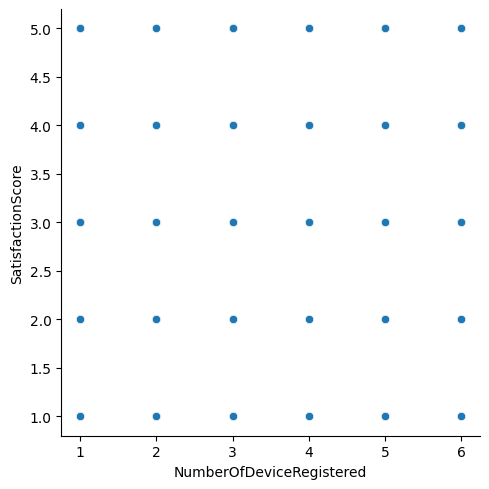

In [98]:

sns.relplot(data=df_train, x='NumberOfDeviceRegistered', y='SatisfactionScore')



## Negatively Correlated Features Vs. Churn



## Let's now take a look at the string features we had dropped earlier 



In [ ]:

["CustomerID", "PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"]




<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

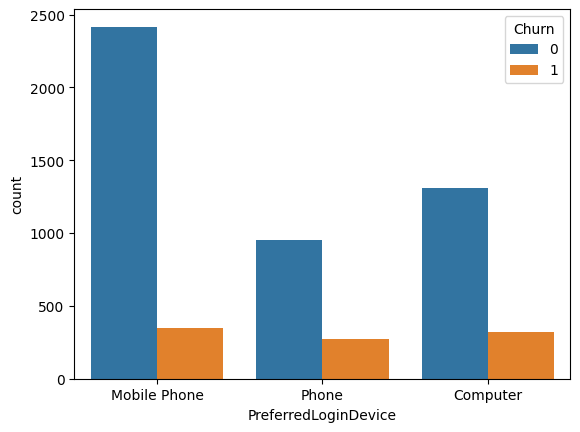

In [93]:

sns.countplot(data=df_train_categorical, x="PreferredLoginDevice", hue="Churn")


In [101]:
#Let's combine both Mobile Phone and Phone as Phone, assuming they both refer to the same thing: Phone, probably smartphones

df_train_categorical["PreferredLoginDevice"] = df_train_categorical["PreferredLoginDevice"].replace(to_replace=['Mobile Phone'], value='Phone')


<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

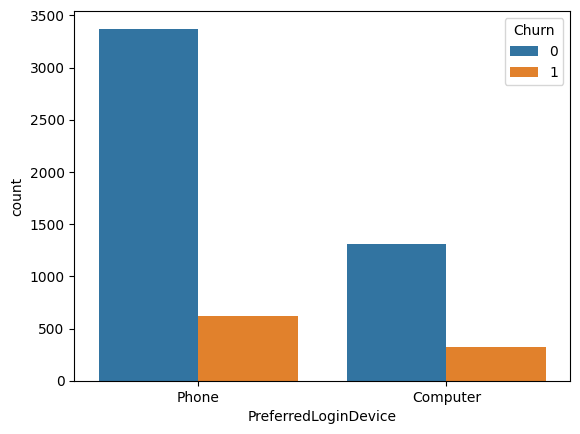

In [102]:
#Let's visualize the above plot again

sns.countplot(data=df_train_categorical, x="PreferredLoginDevice", hue="Churn")


In [105]:
#Percentage of each value in PreferredLoginDevice

df_train_categorical["PreferredLoginDevice"].value_counts(dropna=False)*100/len(df_train_categorical["PreferredLoginDevice"])


PreferredLoginDevice
Phone       70.976909
Computer    29.023091
Name: count, dtype: float64

Observation

We see that Phone tops the list at approx. 70% And it seems like Phone may have a significant impact on customer experience and therefore on 
Churn.


In [ ]:

x['Tenure'] = x.apply(lambda row: 0.5 if row['Tenure']==0.0 else row['Tenure'], axis=1)
    
    x["PreferredPaymentMode"] = x["PreferredPaymentMode"].map({"Debit Card": "debit", "Credit Card": "credit", "E wallet": "wallet", "UPI": "upi", "COD": "cash_delivery", "CC": "credit", "Cash on Delivery": "cash_delivery"})
    x["PreferedOrderCat"] = x["PreferedOrderCat"].replace(to_replace=['Mobile Phone', "Laptop & Accessory"], value=['Mobile', "Laptop_accessory"])
    x['WarehouseToHome'] = x.apply(lambda row: np.nan if row['WarehouseToHome']>120 else row['WarehouseToHome'], axis=1)


## Let's explore some exciting relationships among features that we gathered from the correlation heatmap



## 1. Tenure and CashbackAmount


In [ ]:
## CouponUsed and OrderCount

In [ ]:
DaySinceLastOrder and OrderCount

In [ ]:
CityTier and SatisfactionScore

In [ ]:
Check for outliers - done